In [1]:
import pandas as pd
import numpy as np

import tubesml as tml

import matplotlib.pyplot as plt
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv("data_raw/train.csv")

df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [3]:
_ = tml.list_missing(df)

Column E1: 19.78% missing
Column E10: 11.15% missing
Column E11: 11.15% missing
Column E12: 11.15% missing
Column E13: 11.15% missing
Column E14: 11.15% missing
Column E15: 11.15% missing
Column E16: 11.15% missing
Column E17: 11.15% missing
Column E18: 11.15% missing
Column E19: 11.15% missing
Column E2: 11.15% missing
Column E20: 17.91% missing
Column E3: 11.15% missing
Column E4: 11.15% missing
Column E5: 11.15% missing
Column E6: 11.15% missing
Column E7: 77.25% missing
Column E8: 11.15% missing
Column E9: 11.15% missing
Column I1: 11.15% missing
Column I2: 11.15% missing
Column I3: 11.15% missing
Column I4: 11.15% missing
Column I5: 11.15% missing
Column I6: 11.15% missing
Column I7: 11.15% missing
Column I8: 11.15% missing
Column I9: 11.15% missing
Column M1: 61.49% missing
Column M10: 11.15% missing
Column M11: 11.15% missing
Column M12: 11.15% missing
Column M13: 61.41% missing
Column M14: 61.41% missing
Column M15: 11.15% missing
Column M16: 11.15% missing
Column M17: 11.15% m

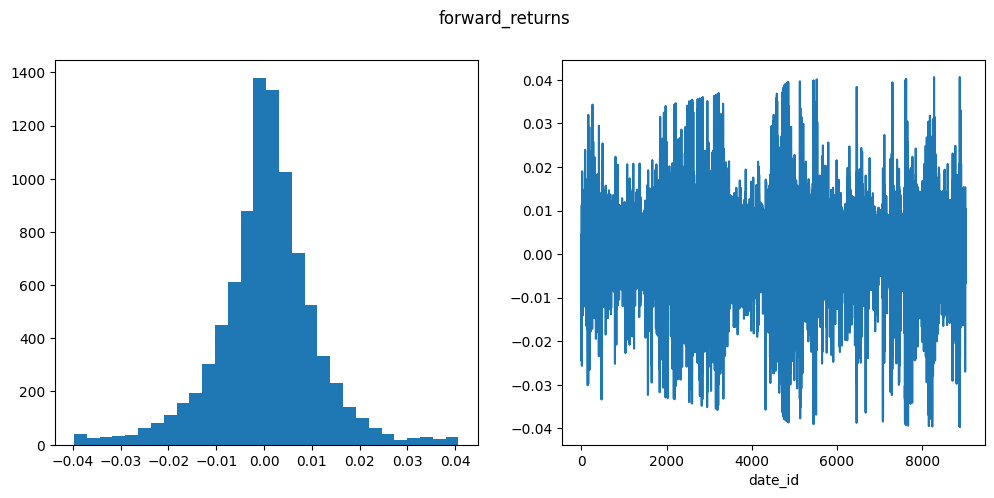

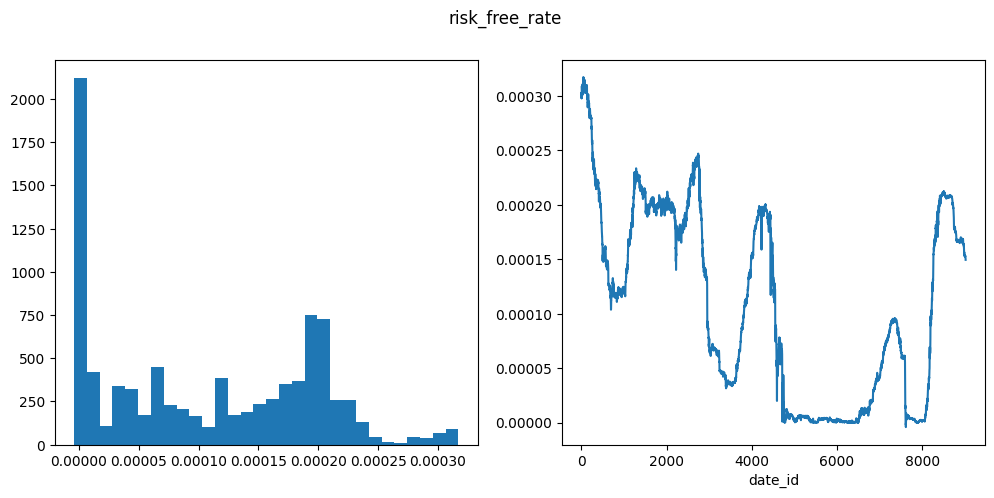

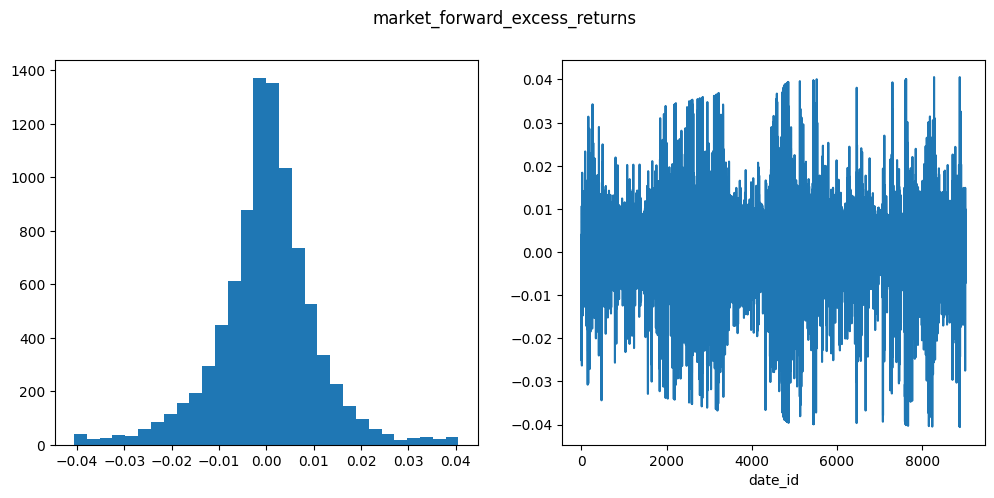

In [19]:
targets = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

for target in targets:
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    df[target].hist(bins=30, ax=ax[0], grid=False)
    df.set_index("date_id")[target].plot(ax=ax[1])
    fig.suptitle(target)
    plt.show()

In [5]:
# solution = train[-180:].copy()

# market_excess_returns = solution['forward_returns'] - solution['risk_free_rate']
# market_excess_cumulative = (1 + market_excess_returns).prod()
# market_mean_excess_return = (market_excess_cumulative) ** (1 / len(solution)) - 1

# c = (1 + market_mean_excess_return) ** (1 / (market_excess_returns > 0).mean()) - 1
# submission = pd.DataFrame({'prediction': (c / market_excess_returns).clip(0, 2)})
# score(solution, submission, '')

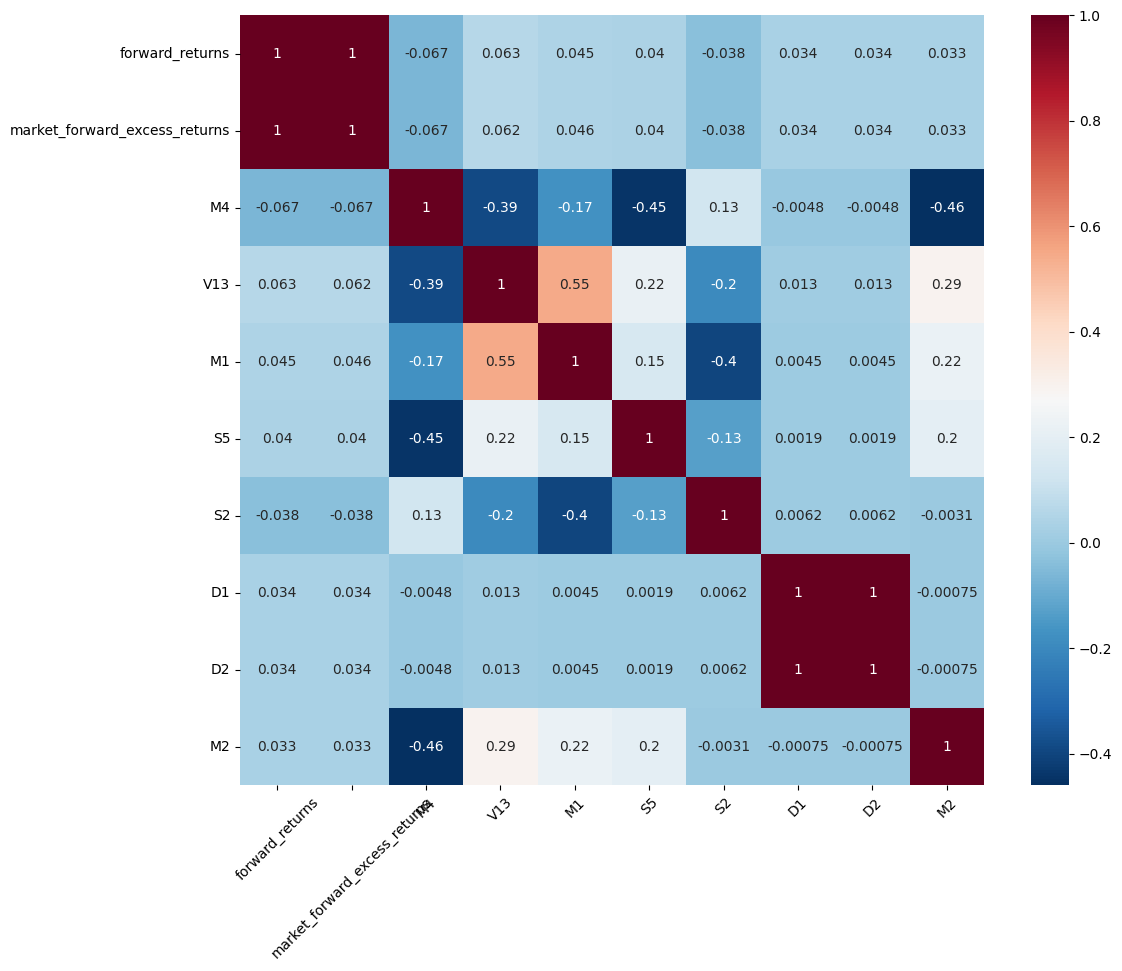

forward_returns                  1.000000
market_forward_excess_returns    0.999943
M4                              -0.066756
V13                              0.063069
M1                               0.044813
S5                               0.040469
S2                              -0.037614
D1                               0.033951
D2                               0.033951
M2                               0.033337
Name: forward_returns, dtype: float64

In [6]:
tml.plot_correlations(data=df, target="forward_returns", limit=10, annot=True)

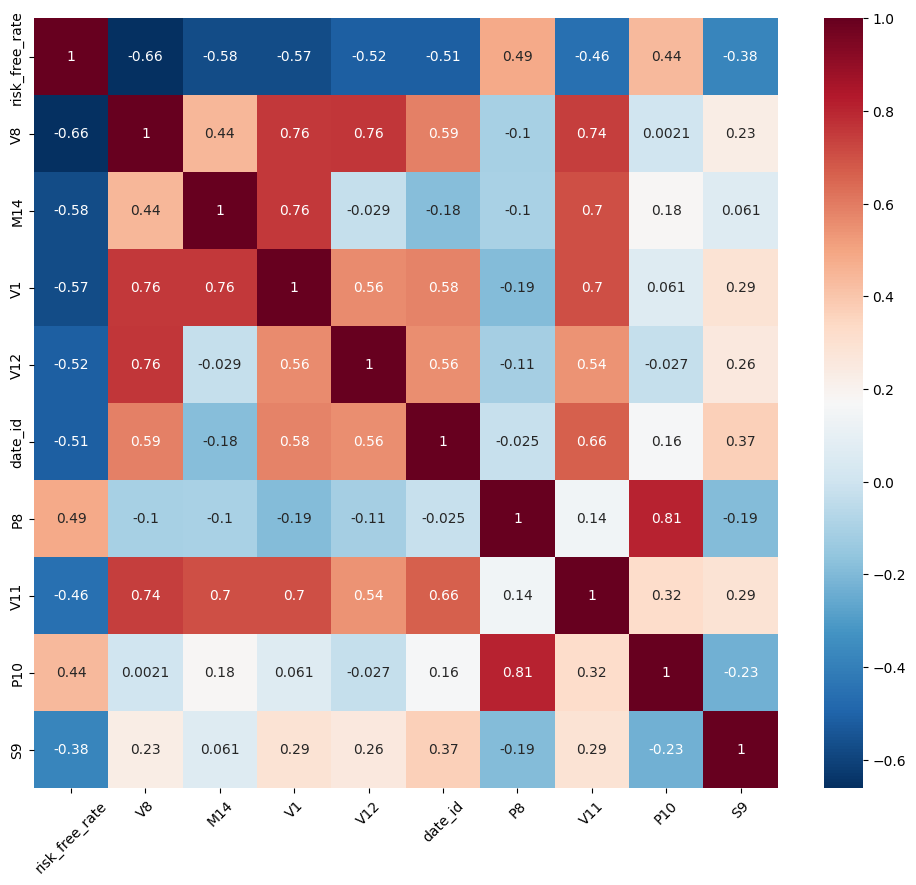

risk_free_rate    1.000000
V8               -0.661568
M14              -0.575216
V1               -0.571406
V12              -0.517913
date_id          -0.513432
P8                0.486511
V11              -0.458049
P10               0.438244
S9               -0.380450
Name: risk_free_rate, dtype: float64

In [7]:
tml.plot_correlations(data=df, target="risk_free_rate", limit=10, annot=True)

In [8]:
tmp = df.copy()
for col in tmp:
    if col in targets:
        continue
    tmp[col] = tmp[col].shift(1)

tmp

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,9015.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.126984,0.445767,0.680419,0.564815,-0.007844,0.111111,-0.121647,-0.000015,0.000151,-0.000477
9017,9016.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.208995,0.484788,0.717308,0.677249,-0.327455,0.083995,-0.380452,-0.005199,0.000150,-0.005661
9018,9017.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.082011,0.482804,1.001028,0.596561,-0.372979,0.094246,-0.427355,0.005930,0.000150,0.005467
9019,9018.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.334656,0.486772,0.894502,0.656746,-0.282024,0.090608,-0.381337,0.008173,0.000150,0.007710


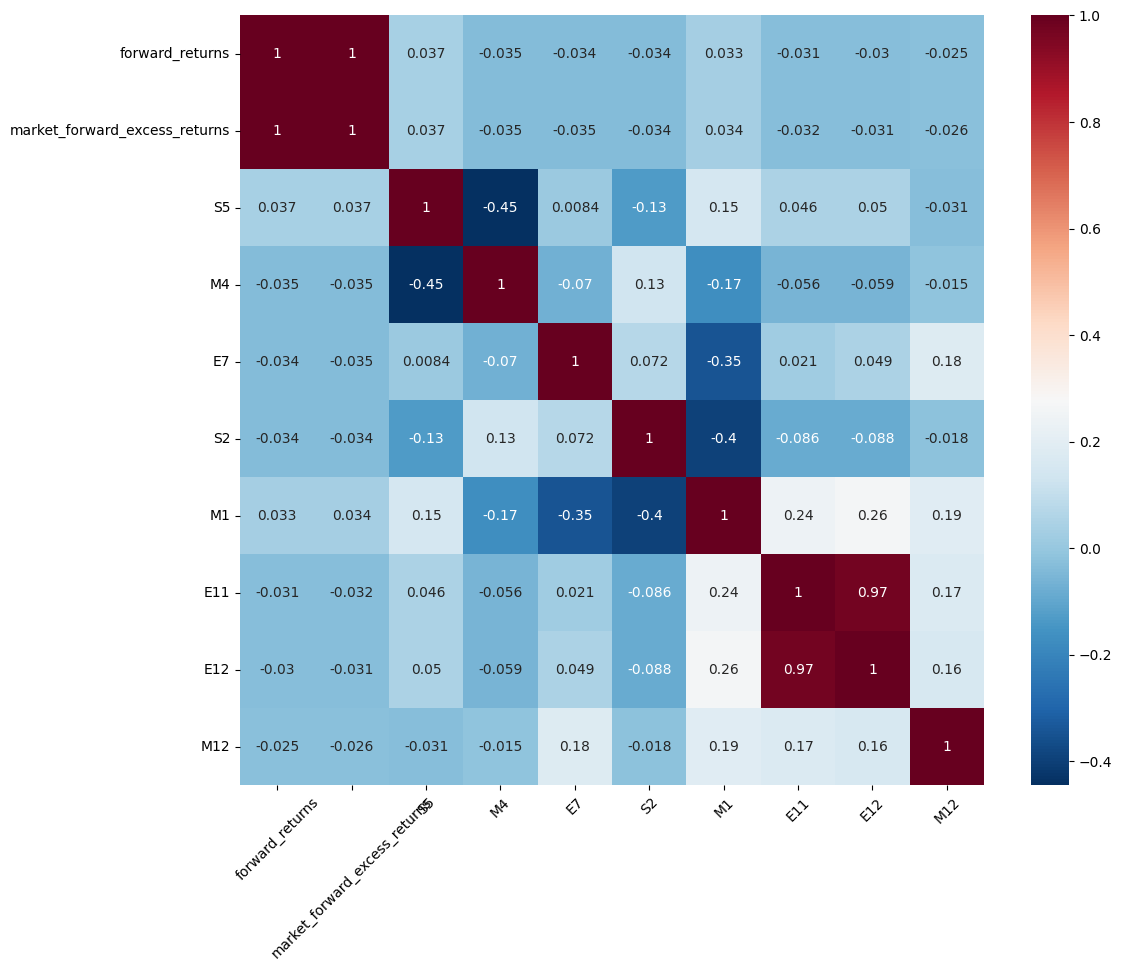

forward_returns                  1.000000
market_forward_excess_returns    0.999943
S5                               0.037210
M4                              -0.035369
E7                              -0.034449
S2                              -0.034013
M1                               0.033158
E11                             -0.030618
E12                             -0.030047
M12                             -0.025446
Name: forward_returns, dtype: float64

In [9]:
tml.plot_correlations(data=tmp, target="forward_returns", limit=10, annot=True)

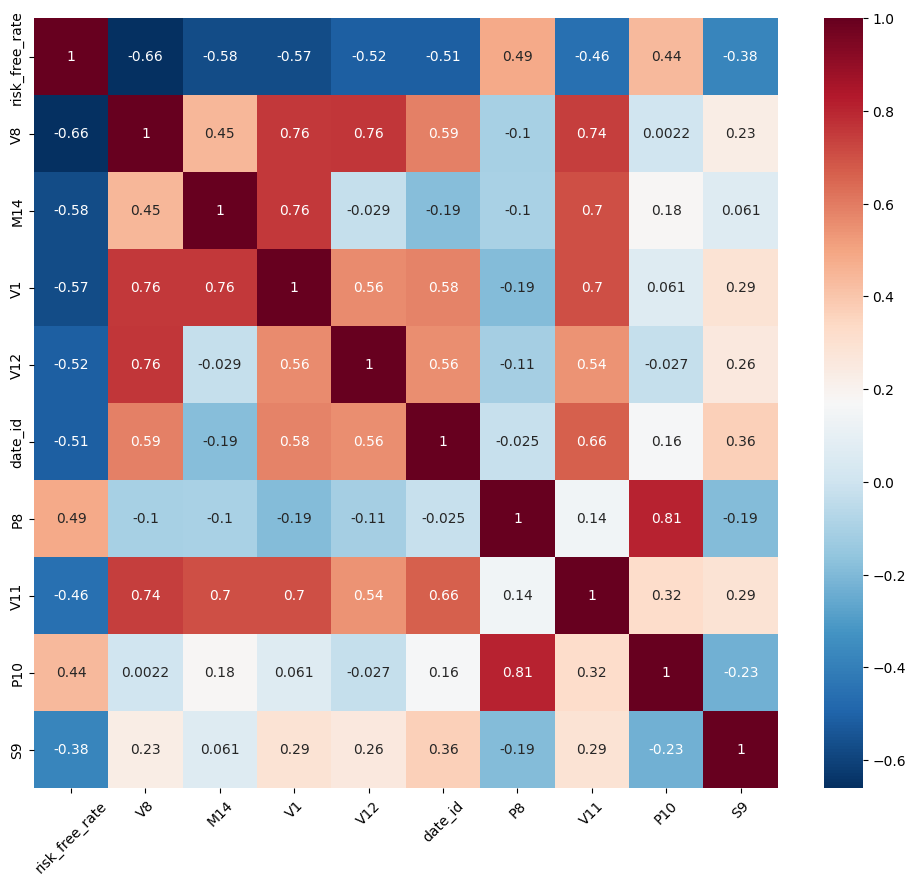

risk_free_rate    1.000000
V8               -0.661172
M14              -0.575681
V1               -0.571412
V12              -0.517828
date_id          -0.513232
P8                0.487197
V11              -0.457767
P10               0.438493
S9               -0.381038
Name: risk_free_rate, dtype: float64

In [10]:
tml.plot_correlations(data=tmp, target="risk_free_rate", limit=10, annot=True)

# TS analysis

In [3]:
tmp = df[["date_id", "forward_returns"]].copy()

tmp["unique_id"]="1"
tmp.columns=["ds", "y", "unique_id"]
tmp.head()

,ds,y,unique_id
0,0,-0.002421,1
1,1,-0.008495,1
2,2,-0.009624,1
3,3,0.004662,1
4,4,-0.011686,1


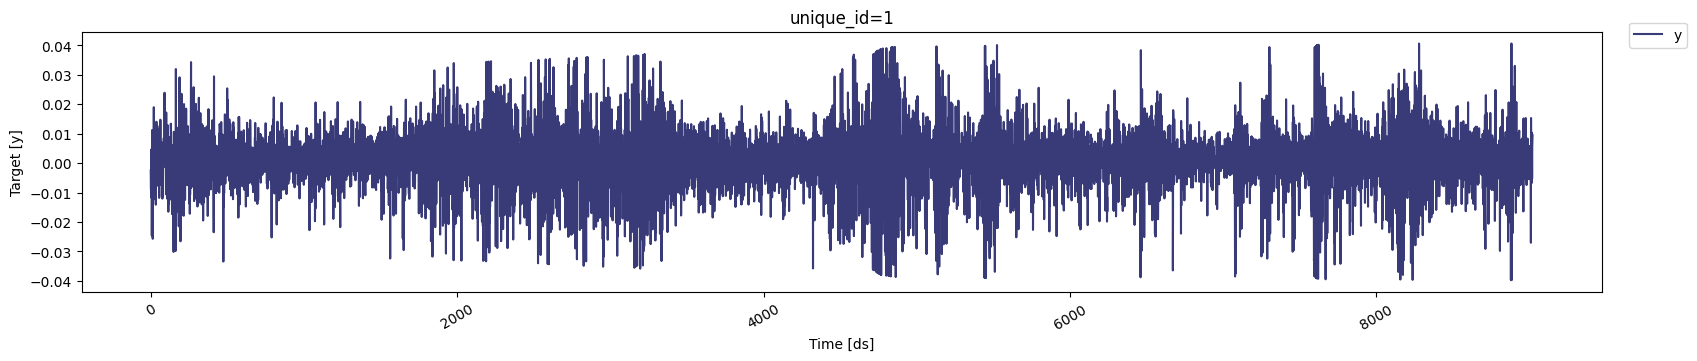

In [4]:
from statsforecast import StatsForecast

StatsForecast.plot(tmp)

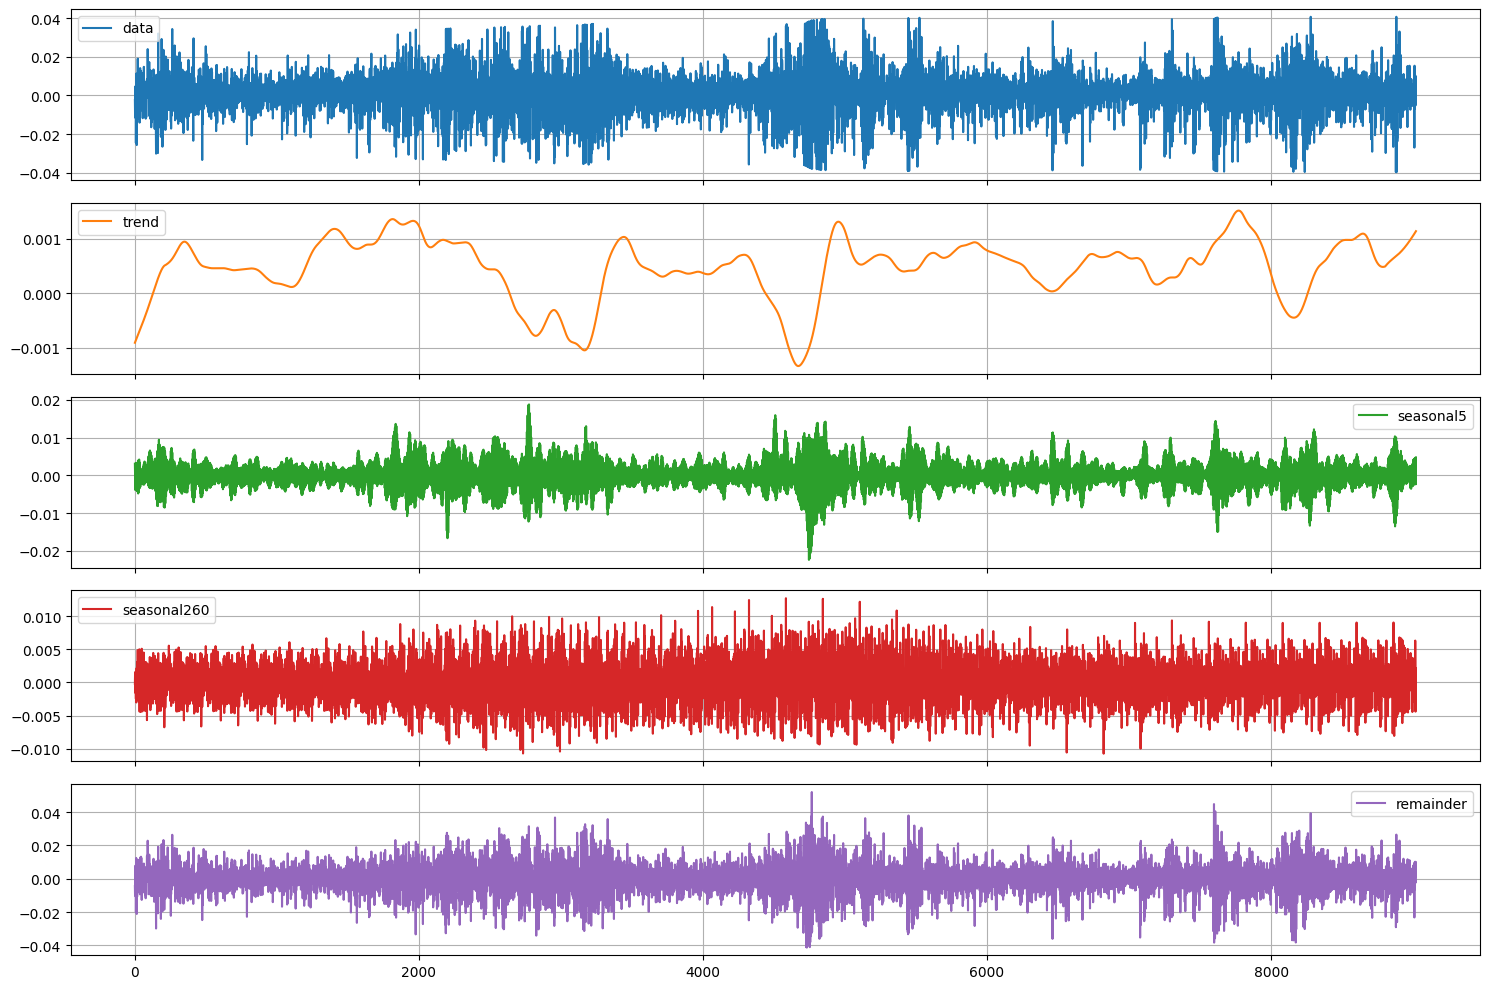

In [5]:
from statsforecast.models import MSTL, AutoARIMA

models = [MSTL(
    season_length=[5, 5*52], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)]

sf = StatsForecast(
    models=models, # model used to fit each time series 
    freq=1, # frequency of the data
)

sf = sf.fit(df=tmp)

sf.fitted_[0, 0].model_.plot(subplots=True, grid=True, figsize=(15,10))
plt.tight_layout()
plt.show()

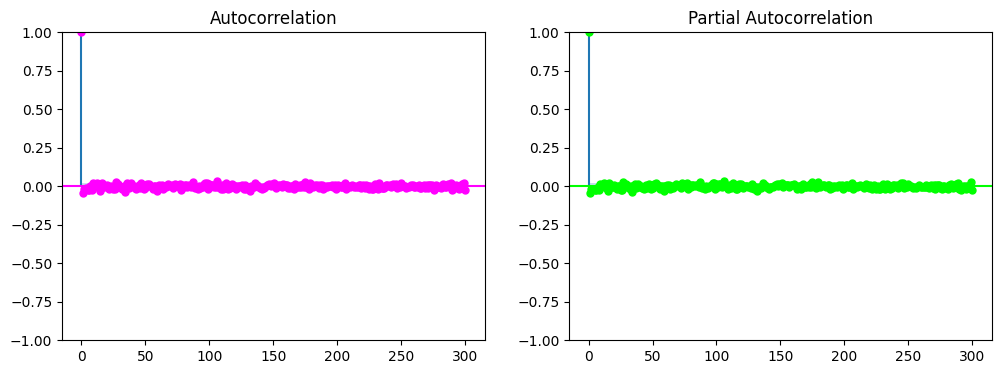

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

plot_acf(tmp["y"],  lags=300, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(tmp["y"],  lags=300, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show()

# Previous values

In [20]:
for i in range(1, 365):
    tmp = df.copy()
    for col in tmp:
        if col in targets:
            continue
        tmp[col] = tmp[col].shift(i)
    max_cor = tmp.corr()["forward_returns"].abs().sort_values(ascending=False)[2:].max()

    if max_cor > 0.1:
        print(i, max_cor)

In [28]:
for i in range(0, 365):
    tmp = df.copy()
    for col in tmp:
        if col in targets:
            continue
        #tmp[col] = tmp[col].shift(1)
        tmp[col] = tmp[col].rolling(i, center=False, closed="right").mean()
    max_cor = tmp.corr()["forward_returns"].abs().sort_values(ascending=False)[2:].max()

    if max_cor > 0.1:
        print(i, max_cor)

# Aggregations

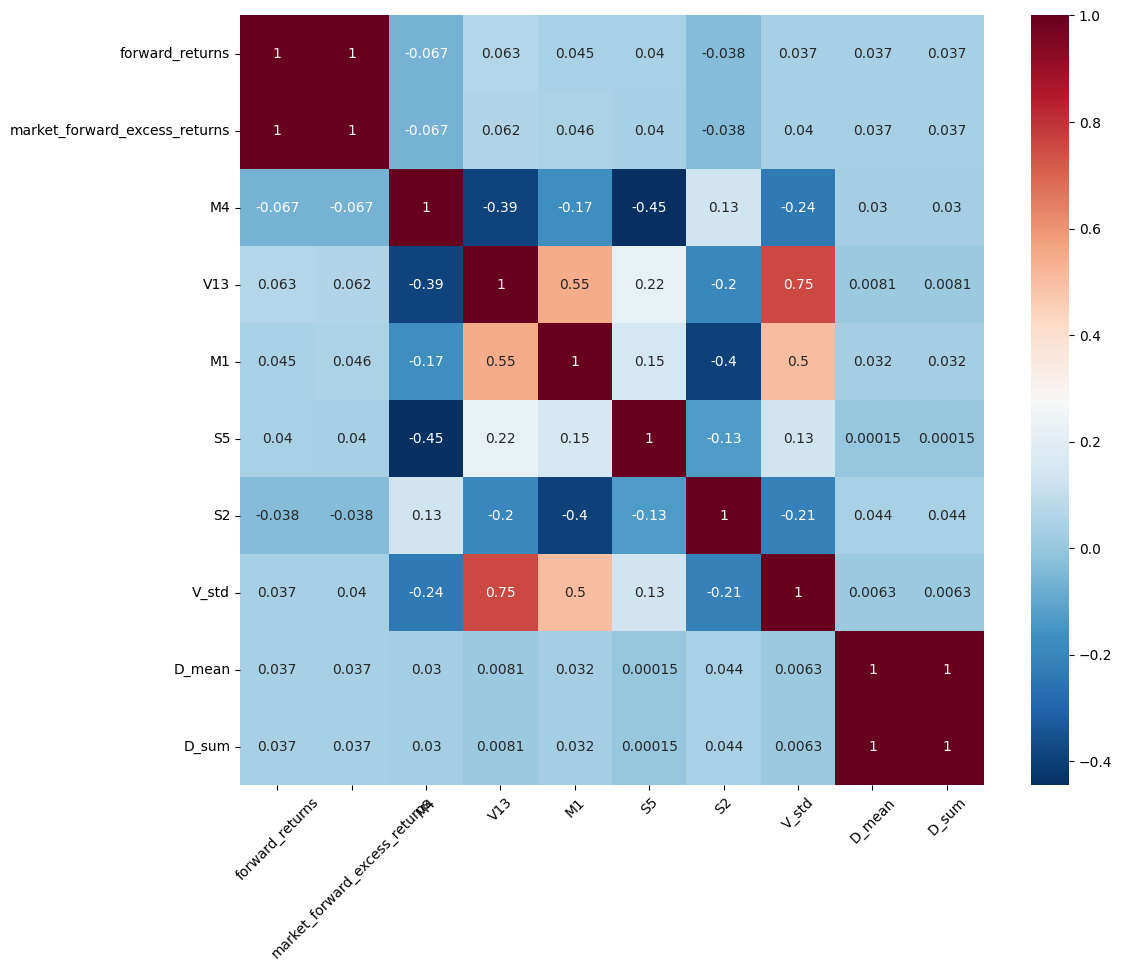

forward_returns                  1.000000
market_forward_excess_returns    0.999943
M4                              -0.066756
V13                              0.063069
M1                               0.044813
S5                               0.040469
S2                              -0.037614
V_std                            0.037464
D_mean                           0.037458
D_sum                            0.037458
Name: forward_returns, dtype: float64

In [31]:
tmp = df.copy()

for t in ["D", "E", "I", "M", "P", "S", "V"]:
    tmp[f"{t}_sum"] = tmp[[c for c in tmp if t in c]].sum(axis=1)
    tmp[f"{t}_mean"] = tmp[[c for c in tmp if t in c]].mean(axis=1)
    tmp[f"{t}_std"] = tmp[[c for c in tmp if t in c]].std(axis=1)
    tmp[f"{t}_min"] = tmp[[c for c in tmp if t in c]].min(axis=1)
    tmp[f"{t}_max"] = tmp[[c for c in tmp if t in c]].max(axis=1)
    tmp[f"{t}_skew"] = tmp[[c for c in tmp if t in c]].skew(axis=1)
    tmp[f"{t}_kurtosis"] = tmp[[c for c in tmp if t in c]].kurtosis(axis=1)

tml.plot_correlations(data=tmp, target="forward_returns", limit=10, annot=True)

In [33]:
df[[c for c in df if "D" in c]].value_counts(dropna=False)

D1  D2  D3  D4  D5  D6  D7  D8  D9
0   0   0   1   0    0  0   0   0     1998
            0   0    0  0   0   0     1571
            1   0   -1  0   0   0     1198
            0   0   -1  0   0   0      876
            1   1    0  0   1   0      463
                            0   1      425
            0   1    0  0   1   0      334
                            0   1      293
            1   0    0  0   1   0      239
        1   1   0    0  0   0   0      231
        0   1   0    0  0   0   1      207
            0   0    0  0   1   0      175
        1   0   0    0  0   0   0      173
        0   1   0    0  1   0   0      129
            0   0    0  0   0   1      128
1   1   0   1   0    0  0   0   0       70
            0   0    0  0   0   0       58
0   0   0   0   0    0  1   0   0       56
                1    0  1   0   1       56
            1   1    0  1   0   1       54
            0   0    0  1   0   1       50
            1   0    0  1   0   1       37
1   1   0   1   0  